In [1]:
from human_eval.evaluation import evaluate_functional_correctness
from human_eval.data import HUMAN_EVAL
import json
import numpy as np
import os
from tqdm.notebook import tqdm
import pandas as pd

In [2]:
def evaluate_correctness(
    sample_file: str,
    k: str = "1,10,100",
    n_workers: int = 4,
    timeout: float = 3.0,
    problem_file: str = HUMAN_EVAL,
):
    """
    Evaluates the functional correctness of generated samples, and writes
    results to f"{sample_file}_results.jsonl.gz"
    """
    k = list(map(int, k.split(",")))
    results = evaluate_functional_correctness(sample_file, k, n_workers, timeout, problem_file)
    return results

def get_average_llm_calls(sample_file: str):
    results = []
    with open(sample_file, "r") as f:
        for line in f:
            results.append(json.loads(line))
    
    if "num_llm_calls" not in results[0]:
        if "direct" in sample_file:
            return 1
        return -1
    
    num_calls = [r["num_llm_calls"] for r in results]

    return np.mean(num_calls)

In [3]:
folder = "results"
runs = 3
llms = ["gpt-4o-mini", "gpt-4o", "Qwen2.5-7B-Instruct-Turbo", "Qwen2.5-72B-Instruct-Turbo", "Qwen2.5-Coder-32B-Instruct"] # ["gpt-4o", "gpt-4o-mini", "Qwen2.5-7B-Instruct-Turbo", "Qwen2.5-72B-Instruct-Turbo", "Qwen2.5-Coder-32B-Instruct"] # , "Meta-Llama-3.1-8B-Instruct-Turbo", "Meta-Llama-3.1-70B-Instruct-Turbo"
approaches = ["direct_prompt", "state_machine_with_feedback", "agent_coder_improved"] # ["direct_prompt", "agent_coder", "agent_coder_improved", "state_machine"]
# llm_names = ["GPT-4o", "GPT-4o Mini",  "Qwen 2.5 7B", "Qwen 2.5 72B", "Qwen 2.5 Coder 32B"] # "Llama 3.1 8B", "Llama 3.1 70B",

In [4]:
evaluation_results = []
for i, llm in enumerate(tqdm(llms)):
    for approach in approaches:
        print(f"Evaluating {llm} {approach}")

        approach_results = []
        for run in range(1, runs + 1):
            result = {
                "llm": llm[i],
                "approach": approach,
                "average_llm_calls": -1,
                "pass@1": -1
            }
            filename = f"{folder}/{llm}/run{run}/{approach}.jsonl"
            if os.path.exists(filename):
                result["average_llm_calls"] = get_average_llm_calls(filename)
                result["pass@1"] = evaluate_correctness(filename)["pass@1"]
            approach_results.append(result)
        
        evaluation_results.append({
            "llm": llm,
            "approach": approach,
            "average_llm_calls": np.mean([r["average_llm_calls"] for r in approach_results]),
            "num_llm_calls": [r["average_llm_calls"] for r in approach_results],
            "all_pass@1": [r["pass@1"] for r in approach_results],
            "pass@1": np.mean([r["pass@1"] for r in approach_results])
        })

  0%|          | 0/5 [00:00<?, ?it/s]

Evaluating gpt-4o-mini direct_prompt
Reading samples...



164it [00:00, 2826.21it/s]


Running test suites...



100%|██████████| 164/164 [00:05<00:00, 29.60it/s]


Writing results to results/gpt-4o-mini/run1/direct_prompt.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 5463.85it/s]


Reading samples...



164it [00:00, 4002.08it/s]


Running test suites...



100%|██████████| 164/164 [00:06<00:00, 26.34it/s]


Writing results to results/gpt-4o-mini/run2/direct_prompt.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 7914.69it/s]


Reading samples...



164it [00:00, 4201.22it/s]


Running test suites...



100%|██████████| 164/164 [00:05<00:00, 28.28it/s]


Writing results to results/gpt-4o-mini/run3/direct_prompt.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 4779.14it/s]


Evaluating gpt-4o-mini state_machine_with_feedback
Reading samples...



164it [00:00, 3778.78it/s]


Running test suites...



100%|██████████| 164/164 [00:05<00:00, 28.00it/s]


Writing results to results/gpt-4o-mini/run1/state_machine_with_feedback.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 2862.47it/s]


Reading samples...



164it [00:00, 5683.95it/s]


Running test suites...



100%|██████████| 164/164 [00:05<00:00, 28.24it/s]


Writing results to results/gpt-4o-mini/run2/state_machine_with_feedback.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 5955.45it/s]


Reading samples...



164it [00:00, 4220.48it/s]


Running test suites...



100%|██████████| 164/164 [00:05<00:00, 32.02it/s]


Writing results to results/gpt-4o-mini/run3/state_machine_with_feedback.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 8336.05it/s]


Evaluating gpt-4o-mini agent_coder_improved
Reading samples...



164it [00:00, 5275.81it/s]


Running test suites...



100%|██████████| 164/164 [00:04<00:00, 40.21it/s]


Writing results to results/gpt-4o-mini/run1/agent_coder_improved.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 5846.76it/s]


Reading samples...



164it [00:00, 3104.21it/s]


Running test suites...



100%|██████████| 164/164 [00:03<00:00, 43.50it/s]


Writing results to results/gpt-4o-mini/run2/agent_coder_improved.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 6412.35it/s]


Reading samples...



164it [00:00, 4165.27it/s]


Running test suites...



100%|██████████| 164/164 [00:03<00:00, 44.50it/s]


Writing results to results/gpt-4o-mini/run3/agent_coder_improved.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 7467.95it/s]


Evaluating gpt-4o direct_prompt
Reading samples...



164it [00:00, 3522.84it/s]


Running test suites...



100%|██████████| 164/164 [00:02<00:00, 74.71it/s]


Writing results to results/gpt-4o/run1/direct_prompt.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 8050.86it/s]


Reading samples...



164it [00:00, 4330.50it/s]


Running test suites...



100%|██████████| 164/164 [00:03<00:00, 46.77it/s]


Writing results to results/gpt-4o/run2/direct_prompt.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 2977.31it/s]


Reading samples...



164it [00:00, 4435.67it/s]


Running test suites...



100%|██████████| 164/164 [00:02<00:00, 60.44it/s]


Writing results to results/gpt-4o/run3/direct_prompt.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 6909.82it/s]


Evaluating gpt-4o state_machine_with_feedback
Reading samples...



164it [00:00, 4725.65it/s]


Running test suites...



100%|██████████| 164/164 [00:05<00:00, 32.34it/s]


Writing results to results/gpt-4o/run1/state_machine_with_feedback.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 7324.27it/s]


Reading samples...



164it [00:00, 4159.18it/s]


Running test suites...



100%|██████████| 164/164 [00:02<00:00, 56.84it/s]


Writing results to results/gpt-4o/run2/state_machine_with_feedback.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 4530.41it/s]


Reading samples...



164it [00:00, 2863.84it/s]


Running test suites...



100%|██████████| 164/164 [00:03<00:00, 51.43it/s]


Writing results to results/gpt-4o/run3/state_machine_with_feedback.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 5161.79it/s]


Evaluating gpt-4o agent_coder_improved
Reading samples...



164it [00:00, 2712.91it/s]


Running test suites...



100%|██████████| 164/164 [00:04<00:00, 40.35it/s]


Writing results to results/gpt-4o/run1/agent_coder_improved.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 5586.64it/s]


Reading samples...



164it [00:00, 3316.05it/s]

Running test suites...




100%|██████████| 164/164 [00:05<00:00, 32.11it/s]


Writing results to results/gpt-4o/run2/agent_coder_improved.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 4370.68it/s]


Reading samples...



164it [00:00, 4520.08it/s]


Running test suites...



100%|██████████| 164/164 [00:04<00:00, 33.21it/s]


Writing results to results/gpt-4o/run3/agent_coder_improved.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 5500.55it/s]


Evaluating Qwen2.5-7B-Instruct-Turbo direct_prompt
Reading samples...



164it [00:00, 4749.41it/s]


Running test suites...



100%|██████████| 164/164 [00:02<00:00, 54.81it/s]


Writing results to results/Qwen2.5-7B-Instruct-Turbo/run1/direct_prompt.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 5538.73it/s]


Reading samples...



164it [00:00, 3353.19it/s]


Running test suites...



100%|██████████| 164/164 [00:02<00:00, 57.16it/s]


Writing results to results/Qwen2.5-7B-Instruct-Turbo/run2/direct_prompt.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 4366.76it/s]


Reading samples...



164it [00:00, 4742.79it/s]

Running test suites...




100%|██████████| 164/164 [00:04<00:00, 32.80it/s]


Writing results to results/Qwen2.5-7B-Instruct-Turbo/run3/direct_prompt.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 4059.64it/s]


Evaluating Qwen2.5-7B-Instruct-Turbo state_machine_with_feedback
Reading samples...



164it [00:00, 3049.04it/s]

Running test suites...




100%|██████████| 164/164 [00:02<00:00, 63.22it/s]


Writing results to results/Qwen2.5-7B-Instruct-Turbo/run1/state_machine_with_feedback.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 6950.67it/s]


Reading samples...



164it [00:00, 3964.85it/s]


Running test suites...



100%|██████████| 164/164 [00:02<00:00, 62.29it/s]


Writing results to results/Qwen2.5-7B-Instruct-Turbo/run2/state_machine_with_feedback.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 5189.25it/s]


Reading samples...



164it [00:00, 4479.20it/s]


Running test suites...



100%|██████████| 164/164 [00:03<00:00, 48.41it/s]


Writing results to results/Qwen2.5-7B-Instruct-Turbo/run3/state_machine_with_feedback.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 6284.98it/s]


Evaluating Qwen2.5-7B-Instruct-Turbo agent_coder_improved
Reading samples...



164it [00:00, 4606.13it/s]


Running test suites...



100%|██████████| 164/164 [00:04<00:00, 34.08it/s]


Writing results to results/Qwen2.5-7B-Instruct-Turbo/run1/agent_coder_improved.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 5690.30it/s]


Reading samples...



164it [00:00, 5126.67it/s]


Running test suites...



100%|██████████| 164/164 [00:02<00:00, 65.57it/s]


Writing results to results/Qwen2.5-7B-Instruct-Turbo/run2/agent_coder_improved.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 6745.37it/s]


Reading samples...



164it [00:00, 4617.76it/s]


Running test suites...



100%|██████████| 164/164 [00:03<00:00, 50.83it/s]


Writing results to results/Qwen2.5-7B-Instruct-Turbo/run3/agent_coder_improved.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 4565.59it/s]


Evaluating Qwen2.5-72B-Instruct-Turbo direct_prompt
Reading samples...



164it [00:00, 3762.28it/s]


Running test suites...



100%|██████████| 164/164 [00:02<00:00, 64.50it/s]


Writing results to results/Qwen2.5-72B-Instruct-Turbo/run1/direct_prompt.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 7081.84it/s]


Reading samples...



164it [00:00, 2515.74it/s]


Running test suites...



100%|██████████| 164/164 [00:02<00:00, 61.99it/s]


Writing results to results/Qwen2.5-72B-Instruct-Turbo/run2/direct_prompt.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 6469.22it/s]


Reading samples...



164it [00:00, 3634.06it/s]


Running test suites...



100%|██████████| 164/164 [00:02<00:00, 62.07it/s]


Writing results to results/Qwen2.5-72B-Instruct-Turbo/run3/direct_prompt.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 7580.29it/s]


Evaluating Qwen2.5-72B-Instruct-Turbo state_machine_with_feedback
Reading samples...



164it [00:00, 4990.07it/s]


Running test suites...



100%|██████████| 164/164 [00:02<00:00, 63.43it/s]


Writing results to results/Qwen2.5-72B-Instruct-Turbo/run1/state_machine_with_feedback.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 4342.23it/s]


Reading samples...



164it [00:00, 3606.93it/s]


Running test suites...



100%|██████████| 164/164 [00:02<00:00, 59.99it/s]


Writing results to results/Qwen2.5-72B-Instruct-Turbo/run2/state_machine_with_feedback.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 5048.11it/s]


Reading samples...



164it [00:00, 3994.60it/s]


Running test suites...



100%|██████████| 164/164 [00:02<00:00, 56.12it/s]


Writing results to results/Qwen2.5-72B-Instruct-Turbo/run3/state_machine_with_feedback.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 4106.37it/s]


Evaluating Qwen2.5-72B-Instruct-Turbo agent_coder_improved
Reading samples...



164it [00:00, 3281.52it/s]


Running test suites...



100%|██████████| 164/164 [00:03<00:00, 45.69it/s]


Writing results to results/Qwen2.5-72B-Instruct-Turbo/run1/agent_coder_improved.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 4501.39it/s]


Reading samples...



164it [00:00, 3113.98it/s]


Running test suites...



100%|██████████| 164/164 [00:02<00:00, 60.20it/s]


Writing results to results/Qwen2.5-72B-Instruct-Turbo/run2/agent_coder_improved.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 5797.49it/s]


Reading samples...



164it [00:00, 4380.11it/s]


Running test suites...



100%|██████████| 164/164 [00:03<00:00, 54.04it/s]


Writing results to results/Qwen2.5-72B-Instruct-Turbo/run3/agent_coder_improved.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 6478.24it/s]


Evaluating Qwen2.5-Coder-32B-Instruct direct_prompt
Reading samples...



164it [00:00, 3435.67it/s]


Running test suites...



100%|██████████| 164/164 [00:02<00:00, 56.80it/s]


Writing results to results/Qwen2.5-Coder-32B-Instruct/run1/direct_prompt.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 5670.17it/s]


Reading samples...



0it [00:00, ?it/s]
164it [00:00, 1400.95it/s]


Running test suites...



100%|██████████| 164/164 [00:05<00:00, 32.71it/s]


Writing results to results/Qwen2.5-Coder-32B-Instruct/run2/direct_prompt.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 4816.68it/s]


Reading samples...



164it [00:00, 1910.19it/s]

Running test suites...




100%|██████████| 164/164 [00:06<00:00, 26.71it/s]


Writing results to results/Qwen2.5-Coder-32B-Instruct/run3/direct_prompt.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 5324.04it/s]


Evaluating Qwen2.5-Coder-32B-Instruct state_machine_with_feedback
Reading samples...



164it [00:00, 4011.65it/s]


Running test suites...



100%|██████████| 164/164 [00:05<00:00, 32.41it/s]


Writing results to results/Qwen2.5-Coder-32B-Instruct/run1/state_machine_with_feedback.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 4052.78it/s]


Reading samples...



164it [00:00, 2637.63it/s]

Running test suites...




100%|██████████| 164/164 [00:02<00:00, 64.57it/s]


Writing results to results/Qwen2.5-Coder-32B-Instruct/run2/state_machine_with_feedback.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 2554.42it/s]


Reading samples...



164it [00:00, 4492.01it/s]


Running test suites...



100%|██████████| 164/164 [00:03<00:00, 54.17it/s]


Writing results to results/Qwen2.5-Coder-32B-Instruct/run3/state_machine_with_feedback.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 4319.90it/s]


Evaluating Qwen2.5-Coder-32B-Instruct agent_coder_improved
Reading samples...



164it [00:00, 3819.59it/s]


Running test suites...



100%|██████████| 164/164 [00:04<00:00, 37.08it/s]


Writing results to results/Qwen2.5-Coder-32B-Instruct/run1/agent_coder_improved.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 5958.08it/s]


Reading samples...



164it [00:00, 4567.41it/s]

Running test suites...




100%|██████████| 164/164 [00:03<00:00, 52.66it/s]


Writing results to results/Qwen2.5-Coder-32B-Instruct/run2/agent_coder_improved.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 4051.35it/s]


Reading samples...



164it [00:00, 4152.75it/s]


Running test suites...



100%|██████████| 164/164 [00:05<00:00, 32.56it/s]


Writing results to results/Qwen2.5-Coder-32B-Instruct/run3/agent_coder_improved.jsonl_results.jsonl...



100%|██████████| 164/164 [00:00<00:00, 4976.46it/s]


## Table I
(The HumanEval column in Table I)
Direct = 

In [5]:
df = pd.DataFrame(evaluation_results)
df = df[["llm", "approach", "pass@1"]]
df[df.select_dtypes(include='number').columns] *= 100
df.round(2)


,llm,approach,pass@1
0,gpt-4o-mini,direct_prompt,85.37
1,gpt-4o-mini,state_machine_with_feedback,88.82
2,gpt-4o-mini,agent_coder_improved,89.23
3,gpt-4o,direct_prompt,91.26
4,gpt-4o,state_machine_with_feedback,90.24
5,gpt-4o,agent_coder_improved,90.85
6,Qwen2.5-7B-Instruct-Turbo,direct_prompt,83.13
7,Qwen2.5-7B-Instruct-Turbo,state_machine_with_feedback,85.37
8,Qwen2.5-7B-Instruct-Turbo,agent_coder_improved,84.55
9,Qwen2.5-72B-Instruct-Turbo,direct_prompt,84.76


In [6]:
(88.82 - 85.37 + 85.37 - 83.13 + 90.65 - 84.76 + 91.26 - 89.84) / 4

3.25

In [7]:
df = pd.DataFrame(evaluation_results)
df = df.set_index(["llm", "approach"])

In [8]:
df.loc[("gpt-4o", "direct_prompt"), "pass@1"]

np.float64(0.9126016260162602)

In [9]:
llms = ["gpt-4o-mini", "gpt-4o", "Qwen2.5-7B-Instruct-Turbo", "Qwen2.5-72B-Instruct-Turbo", "Qwen2.5-Coder-32B-Instruct"] # ["gpt-4o", "gpt-4o-mini", "Qwen2.5-7B-Instruct-Turbo", "Qwen2.5-72B-Instruct-Turbo", "Qwen2.5-Coder-32B-Instruct"] # , "Meta-Llama-3.1-8B-Instruct-Turbo", "Meta-Llama-3.1-70B-Instruct-Turbo"
approaches = ["direct_prompt", "agent_coder_improved", "state_machine_with_feedback"]

llm_names = ["GPT-4o\nMini", "GPT-4o", "Qwen2.5\n7B", "Qwen2.5\n72B", "Qwen2.5\nCoder"]
approach_names = ["Direct", "Agent coder",  "Test-driven"]

In [10]:
pass_data = {}
for approach in approaches:
    approach_pass_data = []
    for llm in llms:
        approach_pass_data.append(df.loc[(llm, approach), "pass@1"] * 100)
    pass_data[approach] = approach_pass_data

call_data = {}
for llm in llms:
    call_data[llm] = []
    for approach in approaches:
        call_data[llm].append(df.loc[(llm, approach), "average_llm_calls"])
    
    

In [11]:
call_data

{'gpt-4o-mini': [np.float64(1.0),
  np.float64(6.609756097560975),
  np.float64(3.327235772357723)],
 'gpt-4o': [np.float64(1.0),
  np.float64(4.804878048780488),
  np.float64(3.028455284552846)],
 'Qwen2.5-7B-Instruct-Turbo': [np.float64(1.0),
  np.float64(6.077235772357724),
  np.float64(4.036585365853658)],
 'Qwen2.5-72B-Instruct-Turbo': [np.float64(1.0),
  np.float64(5.955284552845529),
  np.float64(3.298780487804878)],
 'Qwen2.5-Coder-32B-Instruct': [np.float64(1.0),
  np.float64(5.788617886178862),
  np.float64(3.2947154471544713)]}

[0. 2. 4. 6. 8.]
[0.5 2.5 4.5 6.5 8.5]
[1. 3. 5. 7. 9.]


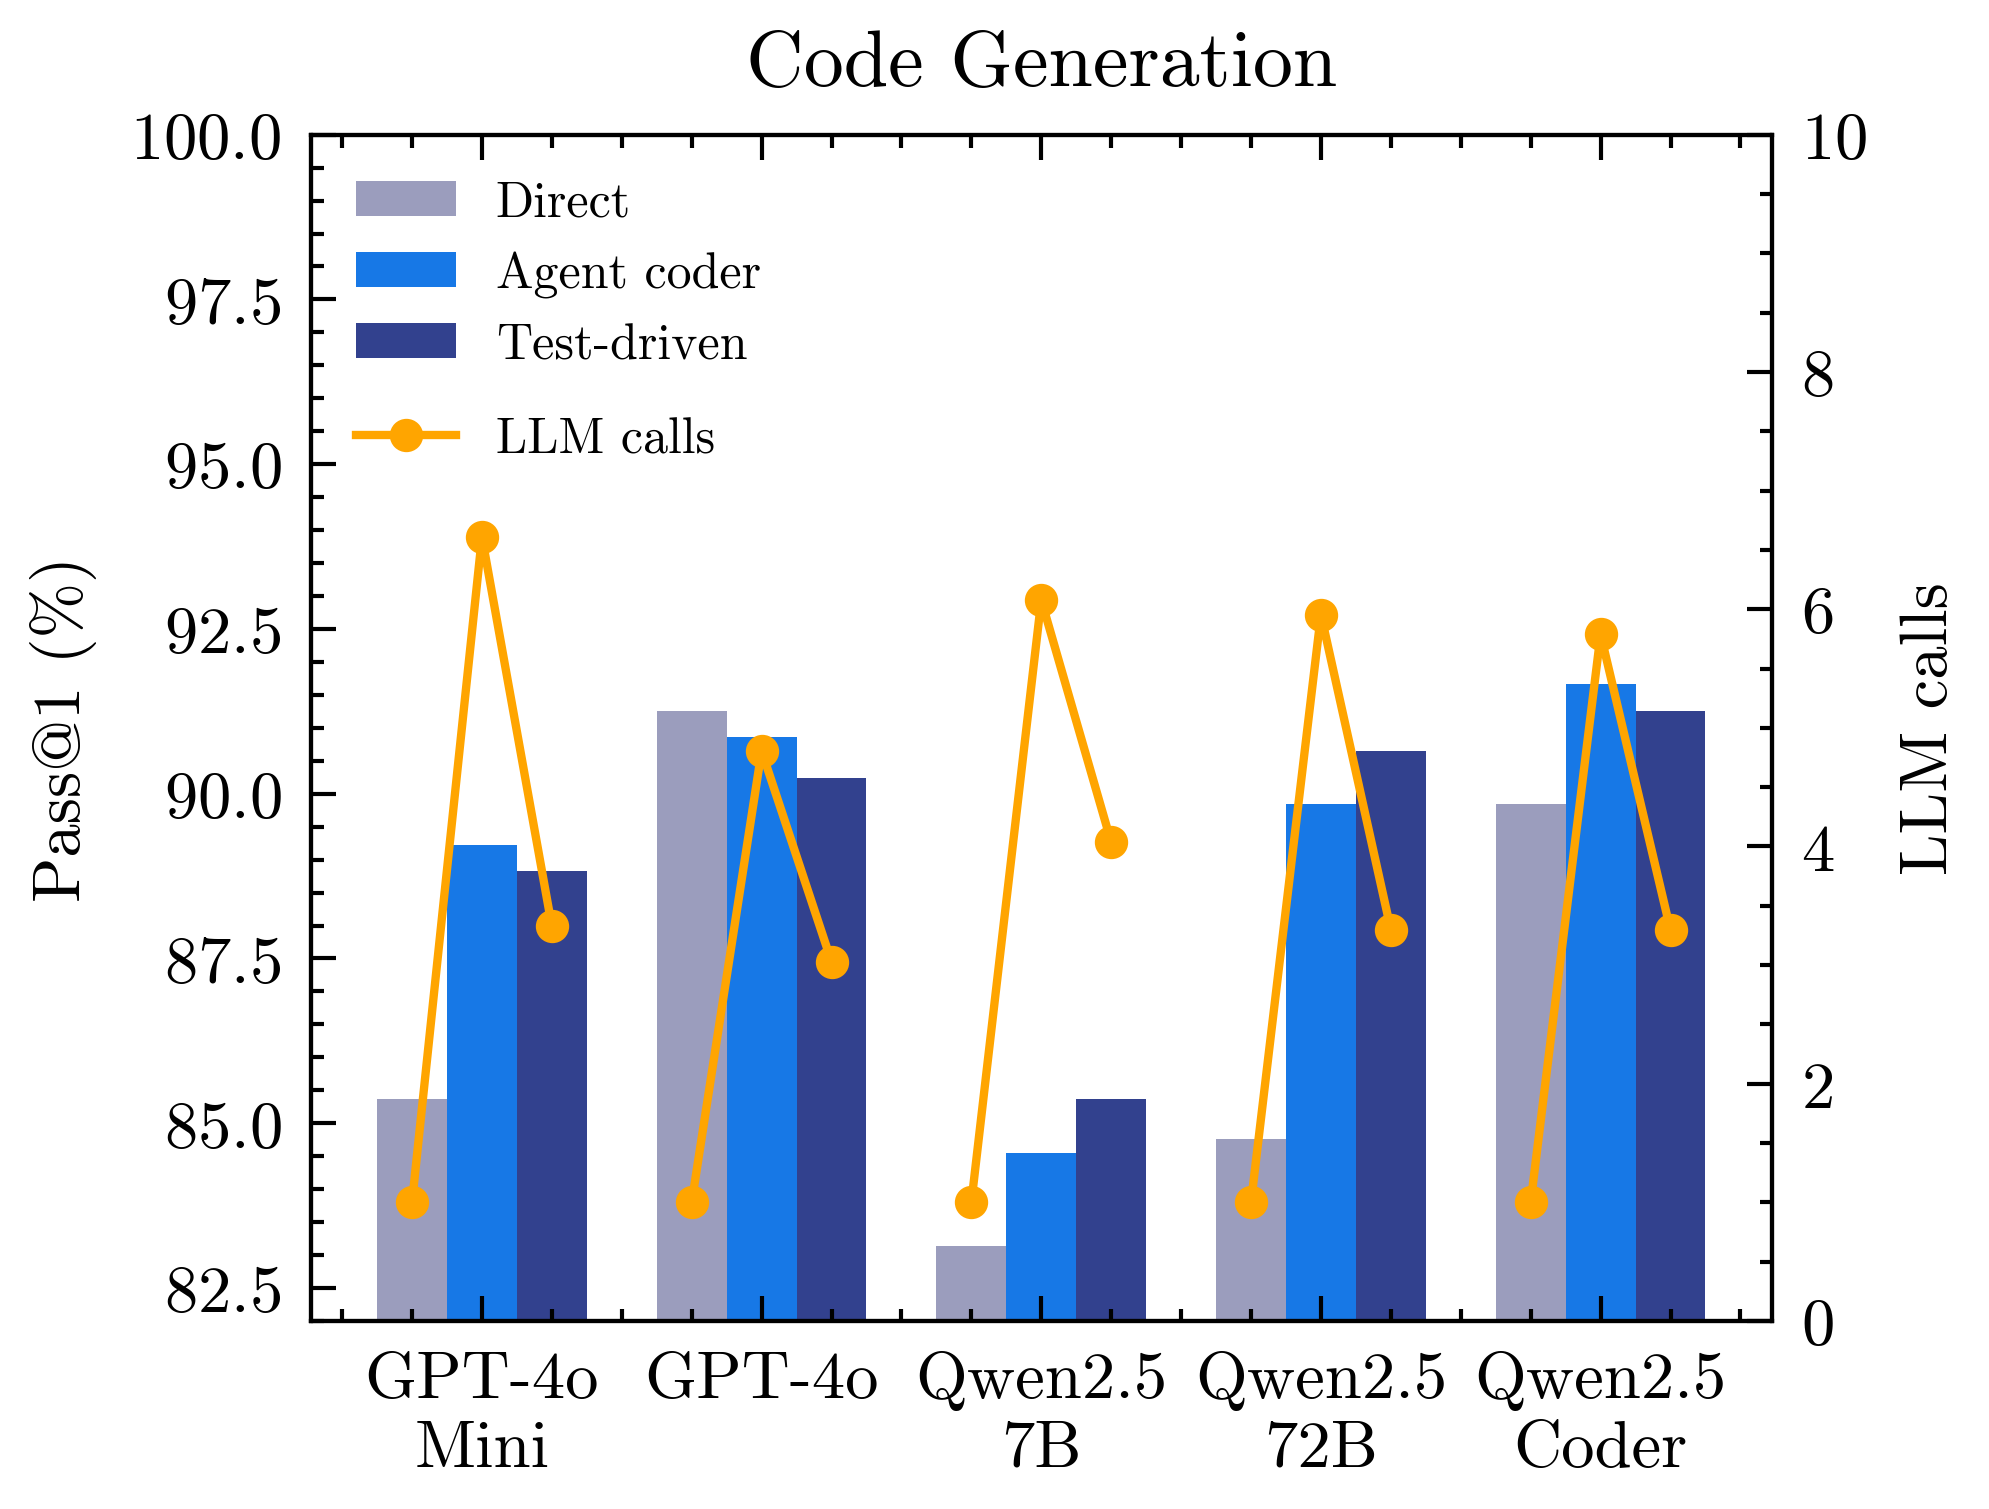

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

plt.style.use(['science','ieee', 'no-latex'])

colors = ["#9b9dbd", "#1778E6", "#32418E"]
x = 2 * np.arange(len(llms))  # the label locations
width = 0.5  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
# fig.set_size_inches(4.5, 4.5)

for attribute, measurement in pass_data.items():
    offset = width * multiplier
    print(x + offset)
    rects = ax.bar(x + offset, measurement, width, label=approach_names[multiplier], color=colors[multiplier])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Pass@1 (%)')
# ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, llm_names)
ax.legend(fontsize=6, loc="upper left")
line_color = "#ffa500"
ax.set_ylim(82, 100)

ax2 = ax.twinx()
start = 0
for i, llm in enumerate(llms):
    x = [start, start + width, start + 2 * width]
    if i == 0:
        ax2.plot(x, call_data[llm], marker='.', color=line_color, linestyle="-", label="LLM calls")
    else:
        ax2.plot(x, call_data[llm], marker='.', color=line_color, linestyle="-")
    start = 4 * width + start
ax2.set_ylabel('LLM calls')
ax2.set_ylim(0, 10)
ax2.legend(fontsize=6, loc='upper left', bbox_to_anchor=(0,0.8))
# ax2.legend(fontsize=5, loc='up')

plt.title("Code Generation")
plt.savefig("code_generation.pdf", bbox_inches='tight', dpi=300)
plt.show()